In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import os

import autokeras as ak

os.chdir("/home/pchabets/Dropbox/STRESS_INDEX/")

In [2]:
# Train data
train = pd.read_csv("scripts/Predictions_explorative/R.scripts/2-yearChronicity/output/segTrain_bagImputedPreProcessingProteomicsBatchCorrected.csv")
train = train.drop('applate', axis=1)

In [3]:
# Test data
test = pd.read_csv("scripts/Predictions_explorative/R.scripts/2-yearChronicity/output/segTest_bagImputedPreProcessingProteomicsBatchCorrected.csv")
test = test.drop('applate', axis=1)

In [4]:
#Turn labels into 0's and 1's: non-remitted = 0, remitted = 1
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 
train['Remitted_depression'] = lbl.fit_transform(train['Remitted_depression']) 
test['Remitted_depression'] = lbl.transform(test['Remitted_depression'])

In [5]:
# Train X and y data
X_train = train.drop(['pident', 'Remitted_depression'], axis=1)
y_train = pd.DataFrame(train['Remitted_depression'])

In [6]:
X_test = test.drop(['pident', 'Remitted_depression'], axis=1)
y_test = pd.DataFrame(test['Remitted_depression'])

## Creating the model

In [7]:
# clf = ak.StructuredDataClassifier(overwrite=False, 
#                                   max_trials=100, 
#                                   objective='val_accuracy',
#                                   directory="scripts/Predictions_explorative/Python.scripts/output"
#                                  )

INFO:tensorflow:Reloading Oracle from existing project scripts/Predictions_explorative/Python.scripts/output/structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from scripts/Predictions_explorative/Python.scripts/output/structured_data_classifier/tuner0.json


In [8]:
# # Feed the structured data classifier with training data.
# clf.fit(X_train, y_train, 
# #         epochs=10, 
#         validation_split=0.3)

In [36]:
# model = clf.export_model()

In [37]:
# model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 184)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 184)               0         
_________________________________________________________________
normalization (Normalization (None, 184)               369       
_________________________________________________________________
dense (Dense)                (None, 32)                5920      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0     

## Model evaluation

In [38]:
# # Predict with the best model.
# predicted_y = clf.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 29ms/step


In [39]:
# # Evaluate the best model with testing data.
# clf.evaluate(X_train, y_train)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

[0.19115053117275238, 0.9551020264625549]

In [40]:
# model.evaluate(X_test, y_test)

4/4 [==============================] - 2s 30ms/step - loss: 0.9177 - accuracy: 0.6364


[0.9176845550537109, 0.6363636255264282]

In [41]:
# from sklearn.metrics import classification_report,confusion_matrix

In [42]:
# print(classification_report(y_test,y_pred=predicted_y))
# print(confusion_matrix(y_test,predicted_y, normalize="true"))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65        59
           1       0.67      0.58      0.62        62

    accuracy                           0.64       121
   macro avg       0.64      0.64      0.64       121
weighted avg       0.64      0.64      0.64       121

[[0.69491525 0.30508475]
 [0.41935484 0.58064516]]


### Save model 

In [43]:
# try:
#     model.save("scripts/VM/Python/output/final_model_autokeras", save_format="tf")
# except Exception:
#     model.save("scripts/VM/Python/output/final_model_autokeras.h5")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

### Load model for further plotting/analysis

In [7]:
loaded_model = tf.keras.models.load_model("scripts/VM/Python/output/final_model_autokeras", 
                                          custom_objects=ak.CUSTOM_OBJECTS
                                         )

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [8]:
loaded_model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 20ms/step - loss: 0.9177 - accuracy: 0.6364


[0.9176845550537109, 0.6363636255264282]

### Plot ROC curve and calculate AUC

In [9]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc, confusion_matrix, plot_confusion_matrix

In [10]:
y_pred_keras = loaded_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

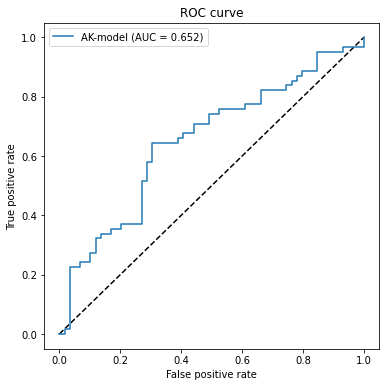

In [11]:
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AK-model (AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Plot confusion matrix

In [12]:
def to_classes(array):
    classes = list()
    for i in array:
        if i <=0.5:
            classes.append(0)
        else:
            classes.append(1)
    return classes

In [13]:
predicted_y = to_classes(y_pred_keras)

In [14]:
cm = confusion_matrix(y_test, predicted_y, normalize="pred", labels=[0, 1])

In [15]:
#non-remitted = 0, remitted = 1
pd.DataFrame(cm)

,0,1
0,0.61194,0.333333
1,0.38806,0.666667


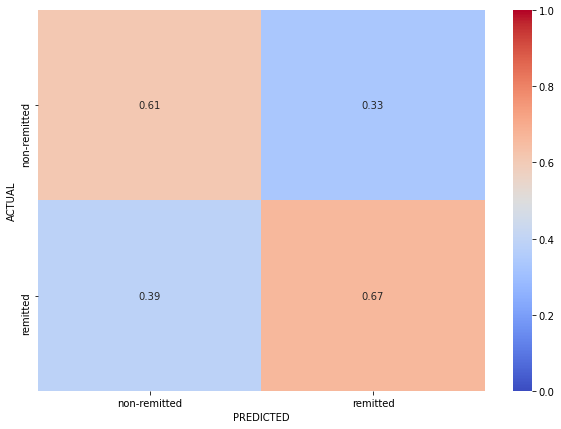

In [16]:
#Plot confusion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
ax = plt.axes()
sns.heatmap(cm, 
            annot=True,
            vmin=0,
            vmax=1,
            cmap='coolwarm',
            xticklabels=['non-remitted', 'remitted'], 
            yticklabels=['non-remitted', 'remitted'])
ax.set(xlabel='PREDICTED', ylabel = 'ACTUAL')
sns.set(font_scale=1.8)

In [17]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, recall_score, precision_score

print("Precision: {}".format(precision_score(y_test,predicted_y).round(2)))
print("Recall: {}".format(recall_score(y_test,predicted_y).round(2)))
print("F1 Score: {}".format(f1_score(y_test,predicted_y).round(2)))
print("Accuracy: {}".format(accuracy_score(y_test,predicted_y).round(2)))
print("Balanced accuracy: {}".format(balanced_accuracy_score(y_test,predicted_y).round(2)))

Precision: 0.67
Recall: 0.58
F1 Score: 0.62
Accuracy: 0.64
Balanced accuracy: 0.64


### Create confidence interval for AUC using DeLong's method
Original Code found in:
https://github.com/yandexdataschool/roc_comparison


In [18]:
import numpy as np
import scipy.stats
from scipy import stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=np.float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=np.float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def compute_midrank_weight(x, sample_weight):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    cumulative_weight = np.cumsum(sample_weight[J])
    N = len(x)
    T = np.zeros(N, dtype=np.float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = cumulative_weight[i:j].mean()
        i = j
    T2 = np.empty(N, dtype=np.float)
    T2[J] = T
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count, sample_weight):
    if sample_weight is None:
        return fastDeLong_no_weights(predictions_sorted_transposed, label_1_count)
    else:
        return fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight)


def fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=np.float)
    ty = np.empty([k, n], dtype=np.float)
    tz = np.empty([k, m + n], dtype=np.float)
    for r in range(k):
        tx[r, :] = compute_midrank_weight(positive_examples[r, :], sample_weight[:m])
        ty[r, :] = compute_midrank_weight(negative_examples[r, :], sample_weight[m:])
        tz[r, :] = compute_midrank_weight(predictions_sorted_transposed[r, :], sample_weight)
    total_positive_weights = sample_weight[:m].sum()
    total_negative_weights = sample_weight[m:].sum()
    pair_weights = np.dot(sample_weight[:m, np.newaxis], sample_weight[np.newaxis, m:])
    total_pair_weights = pair_weights.sum()
    aucs = (sample_weight[:m]*(tz[:, :m] - tx)).sum(axis=1) / total_pair_weights
    v01 = (tz[:, :m] - tx[:, :]) / total_negative_weights
    v10 = 1. - (tz[:, m:] - ty[:, :]) / total_positive_weights
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def fastDeLong_no_weights(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating
              Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=np.float)
    ty = np.empty([k, n], dtype=np.float)
    tz = np.empty([k, m + n], dtype=np.float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth, sample_weight):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    if sample_weight is None:
        ordered_sample_weight = None
    else:
        ordered_sample_weight = sample_weight[order]

    return order, label_1_count, ordered_sample_weight


def delong_roc_variance(ground_truth, predictions, sample_weight=None):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count, ordered_sample_weight = compute_ground_truth_statistics(
        ground_truth, sample_weight)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count, ordered_sample_weight)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov

In [19]:
alpha = .95
y_pred = y_pred_keras
y_true = y_test.values.flatten()

auc, auc_cov = delong_roc_variance(
    y_true,
    y_pred)

auc_std = np.sqrt(auc_cov)
lower_upper_q = np.abs(np.array([0, 1]) - (1 - alpha) / 2)

ci = stats.norm.ppf(
    lower_upper_q,
    loc=auc,
    scale=auc_std)

ci[ci > 1] = 1

print('AUC:', auc)
print('AUC COV:', auc_cov)
print('95% AUC CI:', ci)

AUC: 0.6517222525970475
AUC COV: 0.002538986127398079
95% AUC CI: [0.5529629  0.75048161]
